In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#http://archive.ics.uci.edu/ml/datasets/credit+approval
#http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html
#https://www.kaggle.com/code/chandanabhatt/prediction-of-credit-approval
# Credit approval dataset
# $ Male          : num  1 1 0 0 0 0 1 0 0 0 ...
# $ Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
# $ Debt          : num  4.46 0.5 1.54 5.62 4 ...
# $ Married       : chr  "u" "u" "u" "u" ...
# $ BankCustomer  : chr  "g" "g" "g" "g" ...
# $ EducationLevel: chr  "q" "q" "w" "w" ...
# $ Ethnicity     : chr  "h" "h" "v" "v" ...
# $ YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
# $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
# $ Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
# $ CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
# $ DriversLicense: chr  "f" "f" "t" "f" ...
# $ Citizen       : chr  "g" "g" "g" "s" ...
# $ ZipCode       : chr  "00043" "00280" "00100" "00120" ...
# $ Income        : num  560 824 3 0 0 ...
# $ Approved      : chr  "+" "+" "+" "+" ...

def load_credit_approval():
    df = pd.read_csv('data/credit-approval.data',sep=",")
    protected_attribute = 'Male'
    majority_group_name = "Female"
    minority_group_name = "Male"
    class_label = 'Approved'
    filename = "SVM.credit_approval.abroca.png"
    
    df.head(5)
    #Remove missing value
    df = df[df['Male'] != '?']   
    #Label sex
    df['Male']=["Female" if v == "a" else "Male" for v in df['Male']]
    #Label class
    df['Approved']=[1 if v == "+" else 0 for v in df['Approved']]
    
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
#Credit card client
#Gender (1 = male; 2 = female)
def load_credit_card():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "kNN.credit_card.abroca.png"   
    
    #Label sex
    df['SEX']=["Female" if v == 2 else "Male" for v in df['SEX']]
    print(df.head())
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    # return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
load_credit_card()

   LIMIT_BAL     SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000  Female          2         1   24      2      2     -1     -1   
1     120000  Female          2         2   26     -1      2      0      0   
2      90000  Female          2         2   34      0      0      0      0   
3      50000  Female          2         1   37      0      0      0      0   
4      50000    Male          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment  

In [3]:
#German credit
def load_german_credit():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "male"
    minority_group_name = "female"
    class_label = 'class-label'
    filename = "kNN.german_credit.abroca.png"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    print(feature)
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    # return X_train[0:2], X_test[0:2], y_train[0:2], y_test[0:2],sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name
    return sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
load_german_credit()

['checking-account', 'duration', 'credit-history', 'purpose', 'credit-amount', 'savings-account', 'employment-since', 'installment-rate', 'other-debtors', 'residence-since', 'property', 'age', 'other-installment', 'housing', 'existing-credits', 'job', 'numner-people-provide-maintenance-for', 'telephone', 'foreign-worker', 'sex', 'marital-status']


(19, 0, 'sex', 'kNN.german_credit.abroca.png', 'male', 'female')

In [11]:
def load_PAKDD2010():
    df = pd.read_csv('data/PAKDD.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'TARGET_LABEL_BAD'
    filename = "kNN.PAKDD.abroca.png"    
    
    #Remove ID
    df=df.drop(columns=['ID_CLIENT'])
    df =df.dropna()
    df=df.drop(columns = ['RESIDENCIAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3'])
    #Label sex
    df['SEX']=["Female" if v == "F" else "Male" for v in df['SEX']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [17]:
load_PAKDD2010()

(       CLERK_TYPE  PAYMENT_DAY  QUANT_ADDITIONAL_CARDS  POSTAL_ADDRESS_TYPE  \
 207             0           10                       0                    1   
 44275           0           10                       0                    1   
 17619           0           10                       0                    1   
 10282           0           10                       0                    1   
 36158           0           10                       0                    1   
 ...           ...          ...                     ...                  ...   
 8075            0           20                       0                    1   
 14503           0           15                       0                    1   
 49033           0           10                       0                    1   
 1108            0           10                       0                    1   
 20302           0           15                       0                    1   
 
        SEX  MARITAL_STATUS  QUANT_DEP

In [15]:
#Credit scoring data
#https://www.kaggle.com/code/islombekdavronov/credit-scoring
#FinTech companies in Central Asia.
def load_credit_scoring():
    df = pd.read_csv('data/credit_scoring.csv')    
    protected_attribute = 'Sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'label'
    filename = "kNN.credit_scoring.abroca.png"    
    
    df = df.replace({'-':0})
    df['Score_point']=df['Score_point'].astype(float)
    #Label sex
    df['Sex']=["Female" if v == 2 else "Male" for v in df['Sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,1:length-1]
    y = df[class_label]
    print(df.iloc[300])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [16]:
load_credit_scoring()

label                    0.0
Age                     35.0
Language                 1.0
Sex                      0.0
Marital                  4.0
Has_Credit               1.0
Field                    0.0
Month_of_birth           6.0
Day_of_birth             1.0
Region                  12.0
Number_of_credits        1.0
Linked_cards             1.0
INPS_mln_sum             0.2
INPS_yes_no              0.0
Score_level              0.0
Score_class              0.0
Score_point              0.0
Changed_phone_number     1.0
Name: 300, dtype: float64


(      Age  Language  Sex  Marital  Has_Credit  Field  Month_of_birth  \
 1444   71         1    0        4           1     20               7   
 1652   27         1    1        7           1     10               2   
 7492   27         1    0        6           1     13               3   
 1893   42         1    0        4           1      3               6   
 3879   55         1    0        4           1     16               6   
 ...   ...       ...  ...      ...         ...    ...             ...   
 5734   40         1    1        5           1     13               8   
 5191   40         2    0        4           1     13               2   
 5390   62         1    0        4           1     14               5   
 860    31         1    1        5           2     16               1   
 7270   28         1    1        7           1     13               6   
 
       Day_of_birth  Region  Number_of_credits  Linked_cards  INPS_mln_sum  \
 1444             2      12                 

In [19]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run kNN model
    kNN = KNeighborsClassifier(n_neighbors=5)
    kNN.fit(X_train,y_train)
    y_predicts = kNN.predict(X_test)
    y_pred_probs = kNN.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = kNN.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [20]:
#Main function
def run_eval(dataset):
    if dataset == 'credit-approval':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_approval()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'credit-card':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_card()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'german-credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'PAKDD':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_PAKDD2010()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'credit-scoring':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_scoring()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.6494152046783626, 'accuracy': 0.6617647058823529, 'f1-score': 0.5868263473053892, 'fairness': -0.0105146651909242}
Equal opportunity
{'balanced_accuracy': 0.6494152046783626, 'accuracy': 0.6617647058823529, 'f1-score': 0.5868263473053892, 'fairness': 0.008413461538461564, 'TPR_protected': 0.5384615384615384, 'TPR_non_protected': 0.546875, 'TNR_protected': 0.717948717948718, 'TNR_non_protected': 0.7733333333333333}
Equalized odds
{'balanced_accuracy': 0.6494152046783626, 'accuracy': 0.6617647058823529, 'f1-score': 0.5868263473053892, 'fairness': 0.06379807692307693, 'TPR_protected': 0.5384615384615384, 'TPR_non_protected': 0.546875, 'TNR_protected': 0.717948717948718, 'TNR_non_protected': 0.7733333333333333}
Predictive parity
{'balanced_accuracy': 0.6494152046783626, 'accuracy': 0.6617647058823529, 'f1-score': 0.5868263473053892, 'fairness': 0.11307692307692307, 'TPR_protected': 0.5384615384615384, 'TPR_non_protected': 0.546875, 'TNR_protected

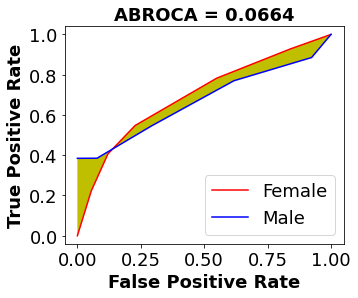

ABROCA: 0.0664343476038413


In [21]:
run_eval('credit-approval')

In [22]:
run_eval('credit-card')

   LIMIT_BAL     SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000  Female          2         1   24      2      2     -1     -1   
1     120000  Female          2         2   26     -1      2      0      0   
2      90000  Female          2         2   34      0      0      0      0   
3      50000  Female          2         1   37      0      0      0      0   
4      50000    Male          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment  

TypeError: cannot unpack non-iterable NoneType object

In [24]:
run_eval('german-credit')

['checking-account', 'duration', 'credit-history', 'purpose', 'credit-amount', 'savings-account', 'employment-since', 'installment-rate', 'other-debtors', 'residence-since', 'property', 'age', 'other-installment', 'housing', 'existing-credits', 'job', 'numner-people-provide-maintenance-for', 'telephone', 'foreign-worker', 'sex', 'marital-status']


ValueError: not enough values to unpack (expected 10, got 6)

Statistical parity:
{'balanced_accuracy': 0.5056743569369014, 'accuracy': 0.6822349815751135, 'f1-score': 0.17855560478511298, 'fairness': -0.005602218569259604}
Equal opportunity
{'balanced_accuracy': 0.5056743569369014, 'accuracy': 0.6822349815751135, 'f1-score': 0.17855560478511298, 'fairness': 0.01915256069351666, 'TPR_protected': 0.13836824696802646, 'TPR_non_protected': 0.1192156862745098, 'TNR_protected': 0.8805043281896876, 'TNR_non_protected': 0.8815064298836497}
Equalized odds
{'balanced_accuracy': 0.5056743569369014, 'accuracy': 0.6822349815751135, 'f1-score': 0.17855560478511298, 'fairness': 0.020154662387478747, 'TPR_protected': 0.13836824696802646, 'TPR_non_protected': 0.1192156862745098, 'TNR_protected': 0.8805043281896876, 'TNR_non_protected': 0.8815064298836497}
Predictive parity
{'balanced_accuracy': 0.5056743569369014, 'accuracy': 0.6822349815751135, 'f1-score': 0.17855560478511298, 'fairness': 0.001292000485808964, 'TPR_protected': 0.13836824696802646, 'TPR_non_prot

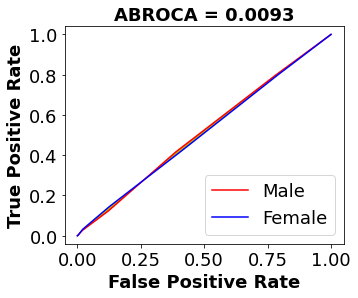

ABROCA: 0.00926376390726015


In [25]:
run_eval('PAKDD')

Statistical parity:
{'balanced_accuracy': 0.8447459855556486, 'accuracy': 0.9581271412257327, 'f1-score': 0.9771784232365145, 'fairness': 0.04602152538692961}
Equal opportunity
{'balanced_accuracy': 0.8447459855556486, 'accuracy': 0.9581271412257327, 'f1-score': 0.9771784232365145, 'fairness': 0.023606713729010353, 'TPR_protected': 0.9731002017484869, 'TPR_non_protected': 0.9967069154774972, 'TNR_protected': 0.7177914110429447, 'TNR_non_protected': 0.6818181818181818}
Equalized odds
{'balanced_accuracy': 0.8447459855556486, 'accuracy': 0.9581271412257327, 'f1-score': 0.9771784232365145, 'fairness': 0.059579942953773335, 'TPR_protected': 0.9731002017484869, 'TPR_non_protected': 0.9967069154774972, 'TNR_protected': 0.7177914110429447, 'TNR_non_protected': 0.6818181818181818}
Predictive parity
{'balanced_accuracy': 0.8447459855556486, 'accuracy': 0.9581271412257327, 'f1-score': 0.9771784232365145, 'fairness': 0.008205497200066025, 'TPR_protected': 0.9731002017484869, 'TPR_non_protected': 

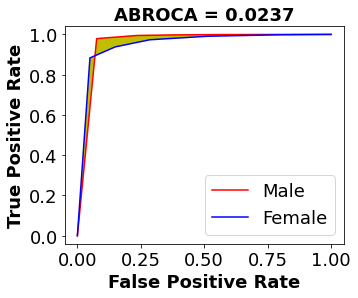

ABROCA: 0.023672455066001928


In [26]:
run_eval('credit-scoring')